# Início: Preparação dos dados

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats

In [4]:
%matplotlib inline

# @grellert: removendo warnings chatos
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [5]:
df = pd.read_csv(os.path.join('..','dados', 'brutos', 'heart_disease_dataset.csv'))

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,52,0,1,169,479,0,0,124,0,3.7,2,3,3,0,0,27.8,0
3065,75,0,4,90,372,0,2,141,0,2.1,2,2,3,0,1,37.0,1
3066,68,1,4,166,564,0,1,76,0,4.5,3,1,3,0,0,16.1,1
3067,66,0,3,143,113,1,1,207,0,3.6,1,0,6,0,0,27.7,0


In [7]:
df = df.dropna()
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      67    1   2       111   536    0        2       88      0      1.3   
1      57    1   3       109   107    0        2      119      0      5.4   
2      43    1   4       171   508    0        1      113      0      3.7   
3      71    0   4        90   523    0        2      152      0      4.7   
4      36    1   2       119   131    0        2      128      0      5.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
3064   52    0   1       169   479    0        0      124      0      3.7   
3065   75    0   4        90   372    0        2      141      0      2.1   
3066   68    1   4       166   564    0        1       76      0      4.5   
3067   66    0   3       143   113    1        1      207      0      3.6   
3068   38    1   4       100   507    0        1      187      0      0.9   

      slope  ca  thal  smoking  diabetes   bmi  heart_disease  
0         3

In [8]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [10]:
TH_CATEGORICO = 5
categoricos = [] 
string = []
quantitativos = []
nao_numericos = []

for col in df:
    print(col, df[col].unique())
    unicos = df[col].unique()
    ## dividindo colunas entre valores categoricos e quantitativos:
    if unicos.shape[0] < TH_CATEGORICO:
        categoricos.append(col)
    else: 
        quantitativos.append(col)
print(f'colunas categoricas: {len(categoricos)}, quantitativas: {len(quantitativos)}')

age [67 57 43 71 36 49 47 51 39 52 64 68 31 50 30 72 58 66 61 40 53 55 70 56
 44 75 65 35 37 46 32 42 54 48 63 45 34 62 38 59 76 73 69 29 33 41 60 74]
sex [1 0]
cp [2 3 4 1]
trestbps [111 109 171  90 119 186 113 103 125 158 164 149 184 144 166 169 143 115
 155 127 199 154 140 124 132 118 126 170 147 128 131 117  92  99 148 195
 165 136 183 121 145  91 192 160 141 180  98 123 138 162 173 142 172 189
 129 134 157 194 107  95 137 200  96 105 153 179 175 151 161 150 122 196
 163  93 178 177 174 104 188 146 130 176 112 197 114 152 159 120 187 182
 168  97 193 191 190 110  94 198 106 102 100 185 139 133 135 108 167 101
 156 181 116]
chol [536 107 508 523 131 571 127 305 592 486 327 227 354 574 311 338 306 417
 382 344 144 204 447 380 333 288 143 593 324 529 241 235 275 548 179 181
 234 443 276 482 342 154 240 556 539 155 114 284 413 518 187 196 243 576
 314 272 322 139 596 281 369 286 577 408 330 254 274 435 214 489 410 580
 399 117 371 111 503 400 291 331 542 192 317 377 452 600 586 402 128

# Fase I - Estatística

## Gerador de Dados Faltantes - MAR, MNAR e MCAR

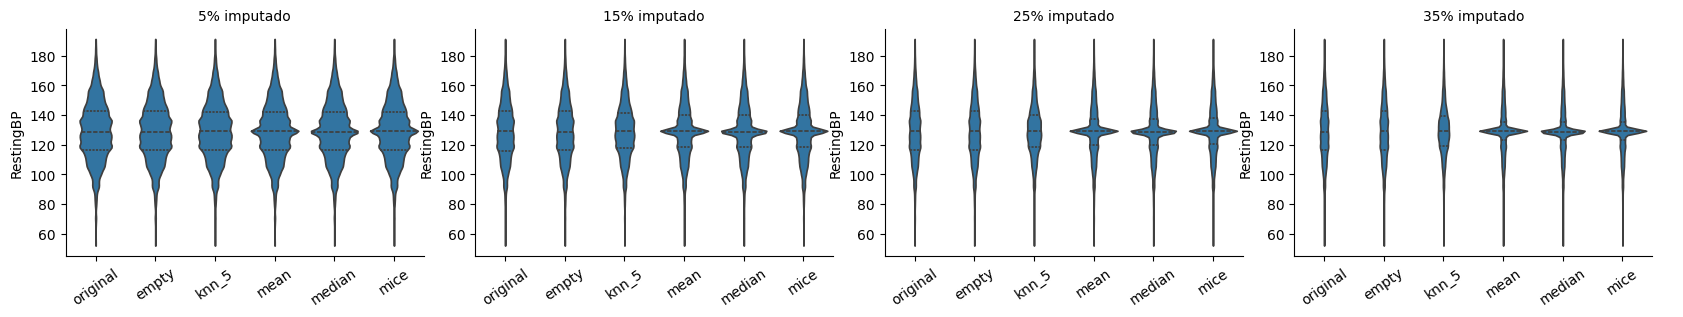

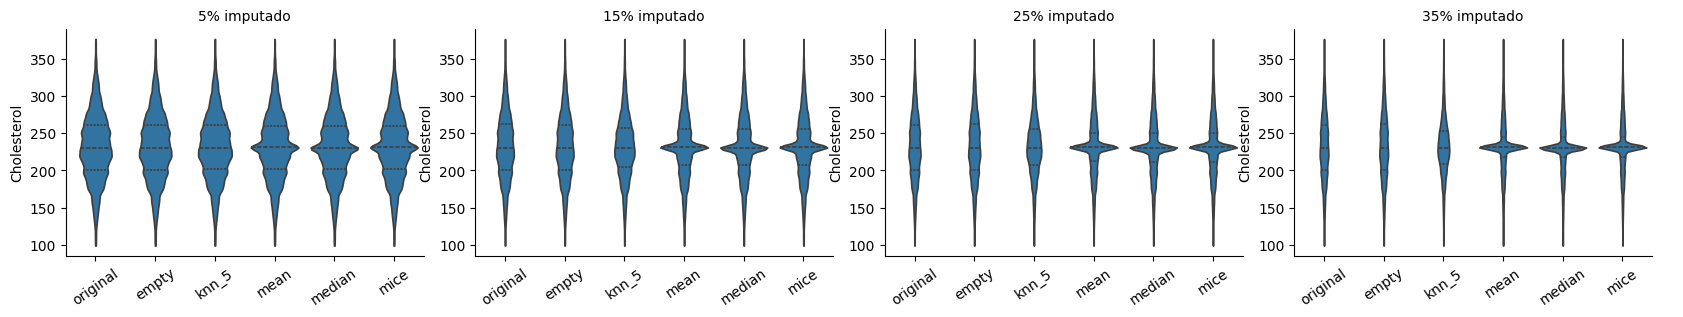

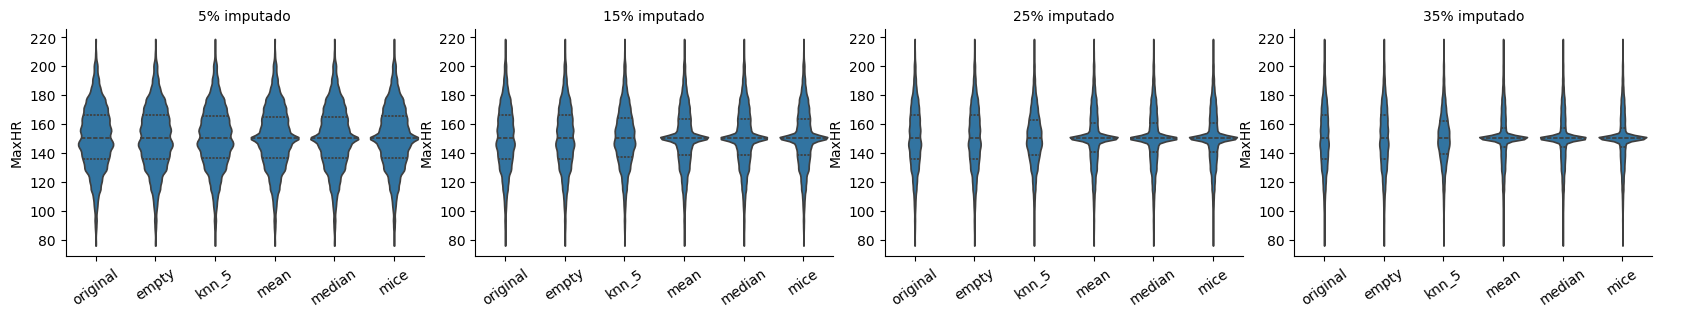

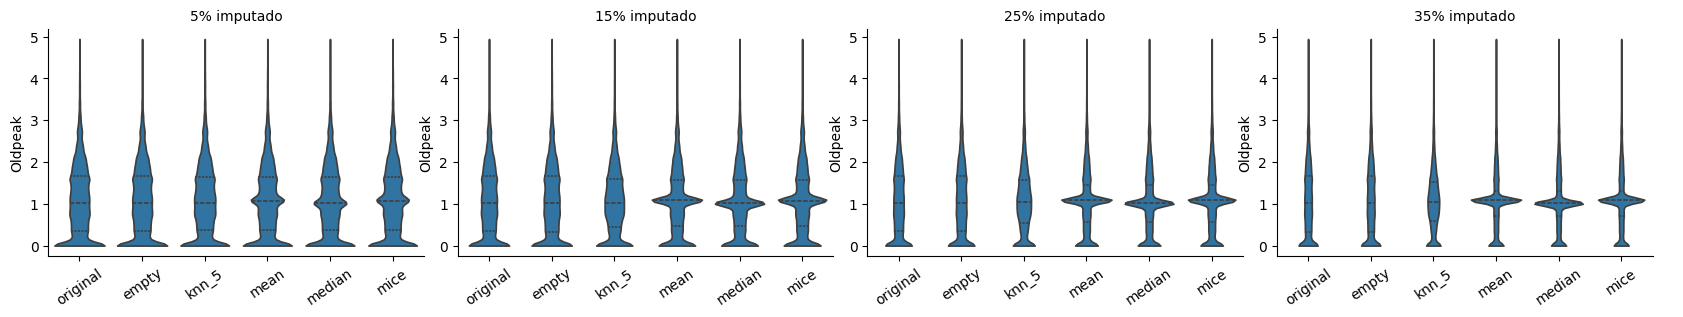

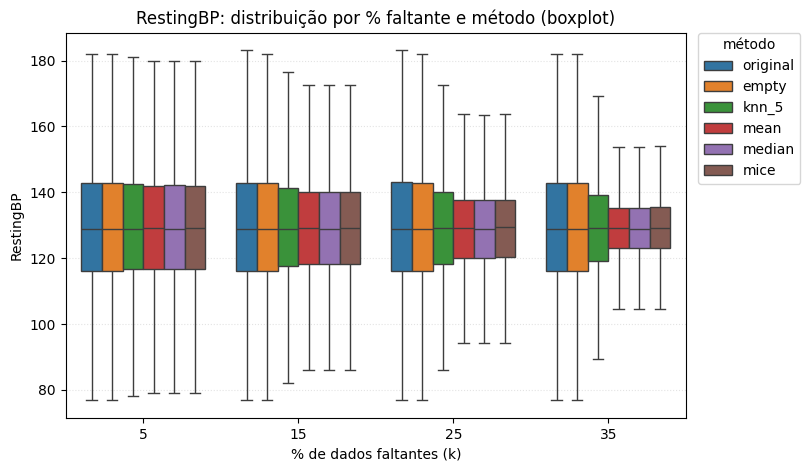

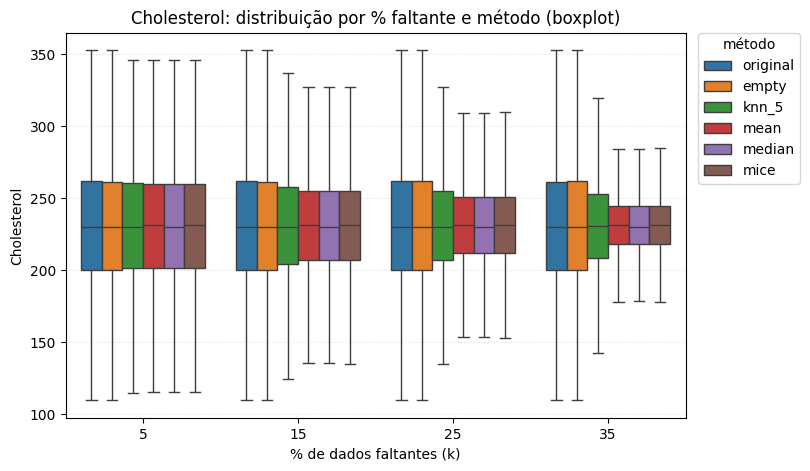

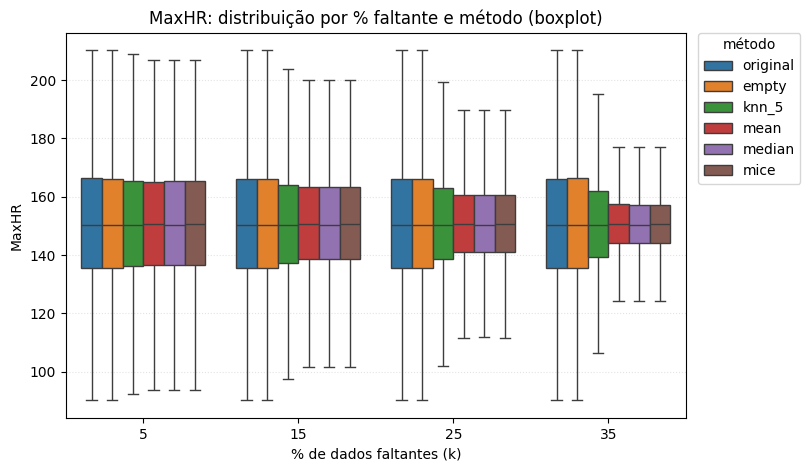

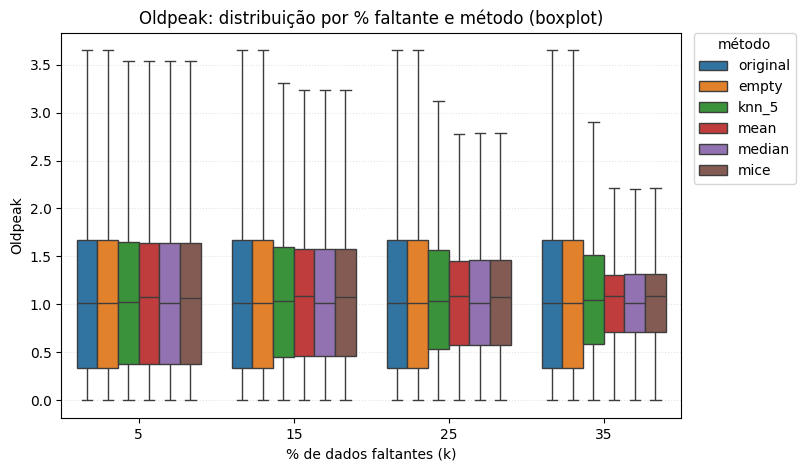

In [13]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer

# ---------------------------------------------------------
# Helpers: aplicar uma imputação sobre um X_nan JÁ mascarado
# ---------------------------------------------------------
def _apply_imputation(X_nan: pd.DataFrame, method: str, seed: int | None = None) -> pd.DataFrame:
    """Aplica imputação no DataFrame X_nan (com NaNs já aplicados).
       Retorna um DataFrame imputado (todas as colunas numéricas)."""
    if method == "mean":
        Xi = X_nan.copy()
        for c in Xi.columns:
            Xi[c] = Xi[c].fillna(Xi[c].mean())
        return Xi

    if method == "median":
        Xi = X_nan.copy()
        for c in Xi.columns:
            Xi[c] = Xi[c].fillna(Xi[c].median())
        return Xi

    if method.startswith("knn_"):
        try:
            n = int(method.split("_", 1)[1])
        except Exception:
            raise ValueError("Use método como 'knn_5', 'knn_7', etc.")
        imp = KNNImputer(n_neighbors=n)
        return pd.DataFrame(imp.fit_transform(X_nan), columns=X_nan.columns, index=X_nan.index)

    if method == "mice":
        # Limites por quantis (conservador) para conter caudas artificiais
        col_mins = X_nan.quantile(0.01, numeric_only=True).reindex(X_nan.columns).to_numpy()
        col_maxs = X_nan.quantile(0.99, numeric_only=True).reindex(X_nan.columns).to_numpy()
        Xnum = X_nan.to_numpy(dtype=float)
        col_mins = np.where(np.isfinite(col_mins), col_mins, np.nanmin(Xnum, axis=0))
        col_maxs = np.where(np.isfinite(col_maxs), col_maxs, np.nanmax(Xnum, axis=0))

        imp = IterativeImputer(
            max_iter=20,
            imputation_order="ascending",
            initial_strategy="median",
            skip_complete=True,
            sample_posterior=False,   # estável (não “espalha”)
            min_value=col_mins,
            max_value=col_maxs,
            random_state=seed,
        )
        return pd.DataFrame(imp.fit_transform(X_nan), columns=X_nan.columns, index=X_nan.index)

    if method == "empty":
        return X_nan.copy()

    raise ValueError(f"Método inválido: {method}")

# ---------------------------------------------------------
# Coletar "dados brutos" (valores) para plotar as distribuições
# ---------------------------------------------------------
def collect_raw_distributions(
    X: pd.DataFrame,
    y: pd.Series,
    columns: list[str],
    methods: list[str],
    ks=(5, 10, 15, 20),
    reps=10,
    missing_mech="MCAR",
    seed_base=2025,
    sample_per_cell: int | None = 2000,
    pick_missing_indices=None,
):
    assert pick_missing_indices is not None, "Passe sua função pick_missing_indices."
    rows = []

    for col in columns:
        # ORIGINAL: sempre íntegro e idêntico em todos os k/rep (útil p/ referência visual)
        v_orig_full = X[col].to_numpy()

        for k in ks:
            for r in range(reps):
                seed = seed_base + 1000 * k + r
                rng = np.random.default_rng(seed)

                # aplica máscara só em uma cópia para o cenário 'k'
                X_nan = X.copy(deep=True)
                to_nan = pick_missing_indices(missing_mech, X_nan, y, col, k, seed=seed)
                if len(to_nan) > 0:
                    X_nan.loc[to_nan, col] = np.nan

                # empilha ORIGINAL (inteiro, sem retirar valores)
                v_orig = v_orig_full
                if sample_per_cell is not None and len(v_orig) > sample_per_cell:
                    v_orig = rng.choice(v_orig, size=sample_per_cell, replace=False)
                rows.extend((col, k, "original", r, float(v)) for v in v_orig)

                # para cada método, aplica na MESMA X_nan
                for method in methods:
                    Xi = _apply_imputation(X_nan, method, seed=seed)
                    if method == "empty":
                        # não imputa: plota apenas os observados
                        v_vals = Xi[col].dropna().to_numpy()
                    else:
                        v_vals = Xi[col].to_numpy()

                    if sample_per_cell is not None and len(v_vals) > sample_per_cell:
                        v_vals = rng.choice(v_vals, size=sample_per_cell, replace=False)

                    rows.extend((col, k, method, r, float(v)) for v in v_vals)

    return pd.DataFrame(rows, columns=["attribute", "pct_imputed", "method", "rep", "value"])

# ---------------------------------------------------------
# Plots: VIOLIN – (A) facet por % faltante, eixo x = método
# ---------------------------------------------------------
def plot_violin_by_pct(df_long: pd.DataFrame, attribute: str,
                       height: float = 3.2, aspect: float = 1.3, sharey: bool = False):
    dfp = df_long[df_long["attribute"] == attribute].copy()
    base = ["original"]
    outros = sorted([m for m in dfp["method"].unique() if m not in base])
    order = base + outros
    dfp["method"] = pd.Categorical(dfp["method"], categories=order, ordered=True)

    g = sns.catplot(
        data=dfp, x="method", y="value", col="pct_imputed",
        kind="violin", sharex=True, sharey=sharey,
        height=height, aspect=aspect, order=order, cut=0, inner="quartile"
    )
    for ax in g.axes.flatten():
        ax.set_xlabel("")
        ax.set_ylabel(attribute)
        ax.tick_params(axis="x", rotation=35)
    g.set_titles("{col_name}% imputado")
    g.add_legend()
    return g

# ---------------------------------------------------------
# Plots: VIOLIN – (B) facet por método, eixo x = % faltante
# ---------------------------------------------------------
def plot_box_all_methods_one_axis(df_long: pd.DataFrame,
                                attribute: str,
                                order_pct: list[int] = (5, 10, 15, 20),
                                showfliers: bool = False,
                                height: float = 5.0,
                                aspect: float = 1.6,
                                legend_out: bool = True,
                            ):
    dfp = df_long[df_long["attribute"] == attribute].copy()
    dfp["pct_imputed"] = pd.Categorical(dfp["pct_imputed"], categories=order_pct, ordered=True)
    base = ["original"]
    outros = sorted([m for m in dfp["method"].unique() if m not in base])
    order_methods = base + outros
    dfp["method"] = pd.Categorical(dfp["method"], categories=order_methods, ordered=True)

    plt.figure(figsize=(height * aspect, height))
    ax = sns.boxplot(
        data=dfp, x="pct_imputed", y="value",
        hue="method", order=order_pct, hue_order=order_methods,
        showfliers=showfliers
    )
    ax.set_xlabel("% de dados faltantes (k)")
    ax.set_ylabel(attribute)
    ax.set_title(f"{attribute}: distribuição por % faltante e método (boxplot)")
    if legend_out:
        ax.legend(title="método", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
    else:
        ax.legend(title="método")
    ax.grid(axis="y", linestyle=":", alpha=0.35)
    return ax


def plot_box_all_methods_one_axis(
    df_long: pd.DataFrame,
    attribute: str,
    order_pct: list[int] = (5, 10, 15, 20),
    showfliers: bool = False,
    height: float = 5.0,
    aspect: float = 1.6,
    legend_out: bool = True,
):
    dfp = df_long[df_long["attribute"] == attribute].copy()
    dfp["pct_imputed"] = pd.Categorical(dfp["pct_imputed"], categories=order_pct, ordered=True)
    base = ["original"]
    outros = sorted([m for m in dfp["method"].unique() if m not in base])
    order_methods = base + outros
    dfp["method"] = pd.Categorical(dfp["method"], categories=order_methods, ordered=True)

    plt.figure(figsize=(height * aspect, height))
    ax = sns.boxplot(
        data=dfp, x="pct_imputed", y="value",
        hue="method", order=order_pct, hue_order=order_methods,
        showfliers=showfliers
    )
    ax.set_xlabel("% de dados faltantes (k)")
    ax.set_ylabel(attribute)
    ax.set_title(f"{attribute}: distribuição por % faltante e método (boxplot)")
    if legend_out:
        ax.legend(title="método", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
    else:
        ax.legend(title="método")
    ax.grid(axis="y", linestyle=":", alpha=0.35)
    return ax


# ---------------------------------------------------------
# EXEMPLO de uso (MCAR simples):
# ---------------------------------------------------------
if __name__ == "__main__":
    def pick_missing_indices(missing_mech, X, y, col, k, seed=None):
        rng = np.random.default_rng(seed)
        n = len(X)
        m = int(round(n * (k / 100.0)))
        candidates = X.index[X[col].notna()].to_numpy()
        m = min(m, len(candidates))
        return rng.choice(candidates, size=m, replace=False) if m > 0 else []

    rng = np.random.default_rng(0)
    n = 3000
    X = pd.DataFrame({
        "RestingBP": rng.normal(130, 20, n),
        "Cholesterol": rng.normal(230, 45, n),
        "MaxHR": rng.normal(150, 22, n),
        "Oldpeak": np.clip(rng.normal(1.0, 1.0, n), 0, None),
    })
    y = pd.Series(rng.integers(0, 2, n), name="target")

    methods = ["empty","mean", "median", "knn_5", "mice"]    # sem MissForest
    ks = (5, 15, 25, 35)
    reps = 200

    df_long = collect_raw_distributions(
        X, y,
        columns=["RestingBP", "Cholesterol", "MaxHR", "Oldpeak"],
        methods=methods,
        ks=ks,
        reps=reps,
        missing_mech="MCAR",        # quando for usar MAR, troque aqui e passe sua função correspondente
        seed_base=2025,
        sample_per_cell=1500,
        pick_missing_indices=pick_missing_indices
    )

    # Violinos: facet por % (x = método)
    for attr in ["RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:
        g = plot_violin_by_pct(df_long, attr, sharey=False)
        plt.show()

    # Box único por atributo: x = % (crescente), hue = método (inclui original e empty)
    for attr in ["RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:
        ax = plot_box_all_methods_one_axis(df_long, attr, order_pct=list(ks), showfliers=False)
        plt.show()


In [14]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer

# ---------- 1) MCAR por coluna (k% sobre os observados) ----------
def pick_missing_indices_mcar(X: pd.DataFrame, col: str, k: float, seed=None):
    rng = np.random.default_rng(seed)
    candidates = X.index[X[col].notna()].to_numpy()
    m = int(round(len(candidates) * (k / 100.0)))
    if m <= 0:
        return np.array([], dtype=int)
    return rng.choice(candidates, size=m, replace=False)

def mask_mcar_all_targets(X: pd.DataFrame, targets: list[str], k: float, seed: int):
    """Aplica MCAR de k% independentemente em cada coluna de 'targets'."""
    X_nan = X.copy(deep=True)
    for i, col in enumerate(targets):
        idx = pick_missing_indices_mcar(X_nan, col, k, seed + i)
        if len(idx) > 0:
            X_nan.loc[idx, col] = np.nan
    return X_nan

# ---------- 2) Seleção do imputador (igual seus métodos, MICE estável) ----------
def make_imputer(method: str, seed: int):
    if method == "mean":
        return SimpleImputer(strategy="mean")
    if method == "median":
        return SimpleImputer(strategy="median")
    if method.startswith("knn_"):
        n = int(method.split("_", 1)[1])
        return KNNImputer(n_neighbors=n)
    if method == "mice":
        return IterativeImputer(
            max_iter=20,
            initial_strategy="median",
            imputation_order="ascending",
            skip_complete=True,
            sample_posterior=False,
            random_state=seed,
        )
    raise ValueError(f"Imputer inválido: {method}")

# ---------- 3) Modelos ----------
def make_models(seed: int = 0):
    return {
        "logreg": LogisticRegression(max_iter=1000, n_jobs=None, random_state=seed),
        "tree": DecisionTreeClassifier(random_state=seed),
        "rf": RandomForestClassifier(n_estimators=300, random_state=seed, n_jobs=-1),
    }

# ---------- 4) Avaliação com CV (imputação DENTRO do fold, sem vazamento) ----------
def evaluate_predictive_performance(
    X: pd.DataFrame,
    y: pd.Series,
    methods: list[str],            # ["mean","median","knn_5","mice"]
    targets: list[str],            # colunas numéricas que podem ter NaN
    ks=(5, 10, 15, 20),
    reps=10,
    seed_base=2025,
    n_splits=5,
):
    rows = []
    for k in ks:
        for r in range(reps):
            seed = seed_base + 1000 * k + r

            # gera X com NaNs (MCAR) nas colunas-alvo
            X_nan = mask_mcar_all_targets(X, targets, k, seed)

            # CV estratificado
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
            models = make_models(seed)

            for method in methods:
                imputer = make_imputer(method, seed)

                for model_name, clf in models.items():
                    # Pipeline (imputer -> (scaler opcional) -> modelo)
                    # scaler só para logreg (árvore/RF não precisam de escala)
                    if model_name == "logreg":
                        pipe = Pipeline([
                            ("imp", imputer),
                            ("scaler", StandardScaler(with_mean=True, with_std=True)),
                            ("clf", clf),
                        ])
                    else:
                        pipe = Pipeline([
                            ("imp", imputer),
                            ("clf", clf),
                        ])

                    accs, f1s = [], []
                    for tr, te in skf.split(X_nan, y):
                        pipe.fit(X_nan.iloc[tr], y.iloc[tr])
                        pred = pipe.predict(X_nan.iloc[te])
                        accs.append(accuracy_score(y.iloc[te], pred))
                        f1s.append(f1_score(y.iloc[te], pred))  # y é 0/1

                    rows.append([
                        k, r, method, model_name,
                        np.mean(accs), np.std(accs),
                        np.mean(f1s), np.std(f1s),
                    ])

    return pd.DataFrame(
        rows,
        columns=["pct_imputed","rep","method","model","acc_mean","acc_std","f1_mean","f1_std"]
    )

# ---------- 5) Plots auxiliares ----------
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pred_metric(df_pred: pd.DataFrame, metric: str, model: str, methods_order=None):
    sub = df_pred[df_pred["model"] == model].copy()
    if methods_order is None:
        methods_order = sorted(sub["method"].unique())
    sub["method"] = pd.Categorical(sub["method"], categories=methods_order, ordered=True)

    plt.figure(figsize=(8,4.5))
    ax = sns.lineplot(
        data=sub, x="pct_imputed", y=metric, hue="method",
        estimator="median", errorbar=("pi",50), marker="o", hue_order=methods_order
    )
    ax.set_xlabel("% de dados faltantes (k)")
    ax.set_ylabel(metric)
    ax.set_title(f"{model}: {metric} vs k (mediana ± IQR sobre reps)")
    ax.grid(axis="both", linestyle=":", alpha=0.35)
    return ax
